In [32]:
!pip install seaborn
!pip install numpy=1.21.4

ERROR: Invalid requirement: 'numpy=1.21.4'
Hint: = is not a valid operator. Did you mean == ?


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import scikit_posthocs as sp
from scipy import stats
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
data = pd.read_csv("wine-clustering - wine-clustering.csv")

In [13]:
data.info() #all non-null
print(data.isnull().sum() / data.shape[0] * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
Alcohol                0.0000
Malic_Acid             0.0000
Ash               

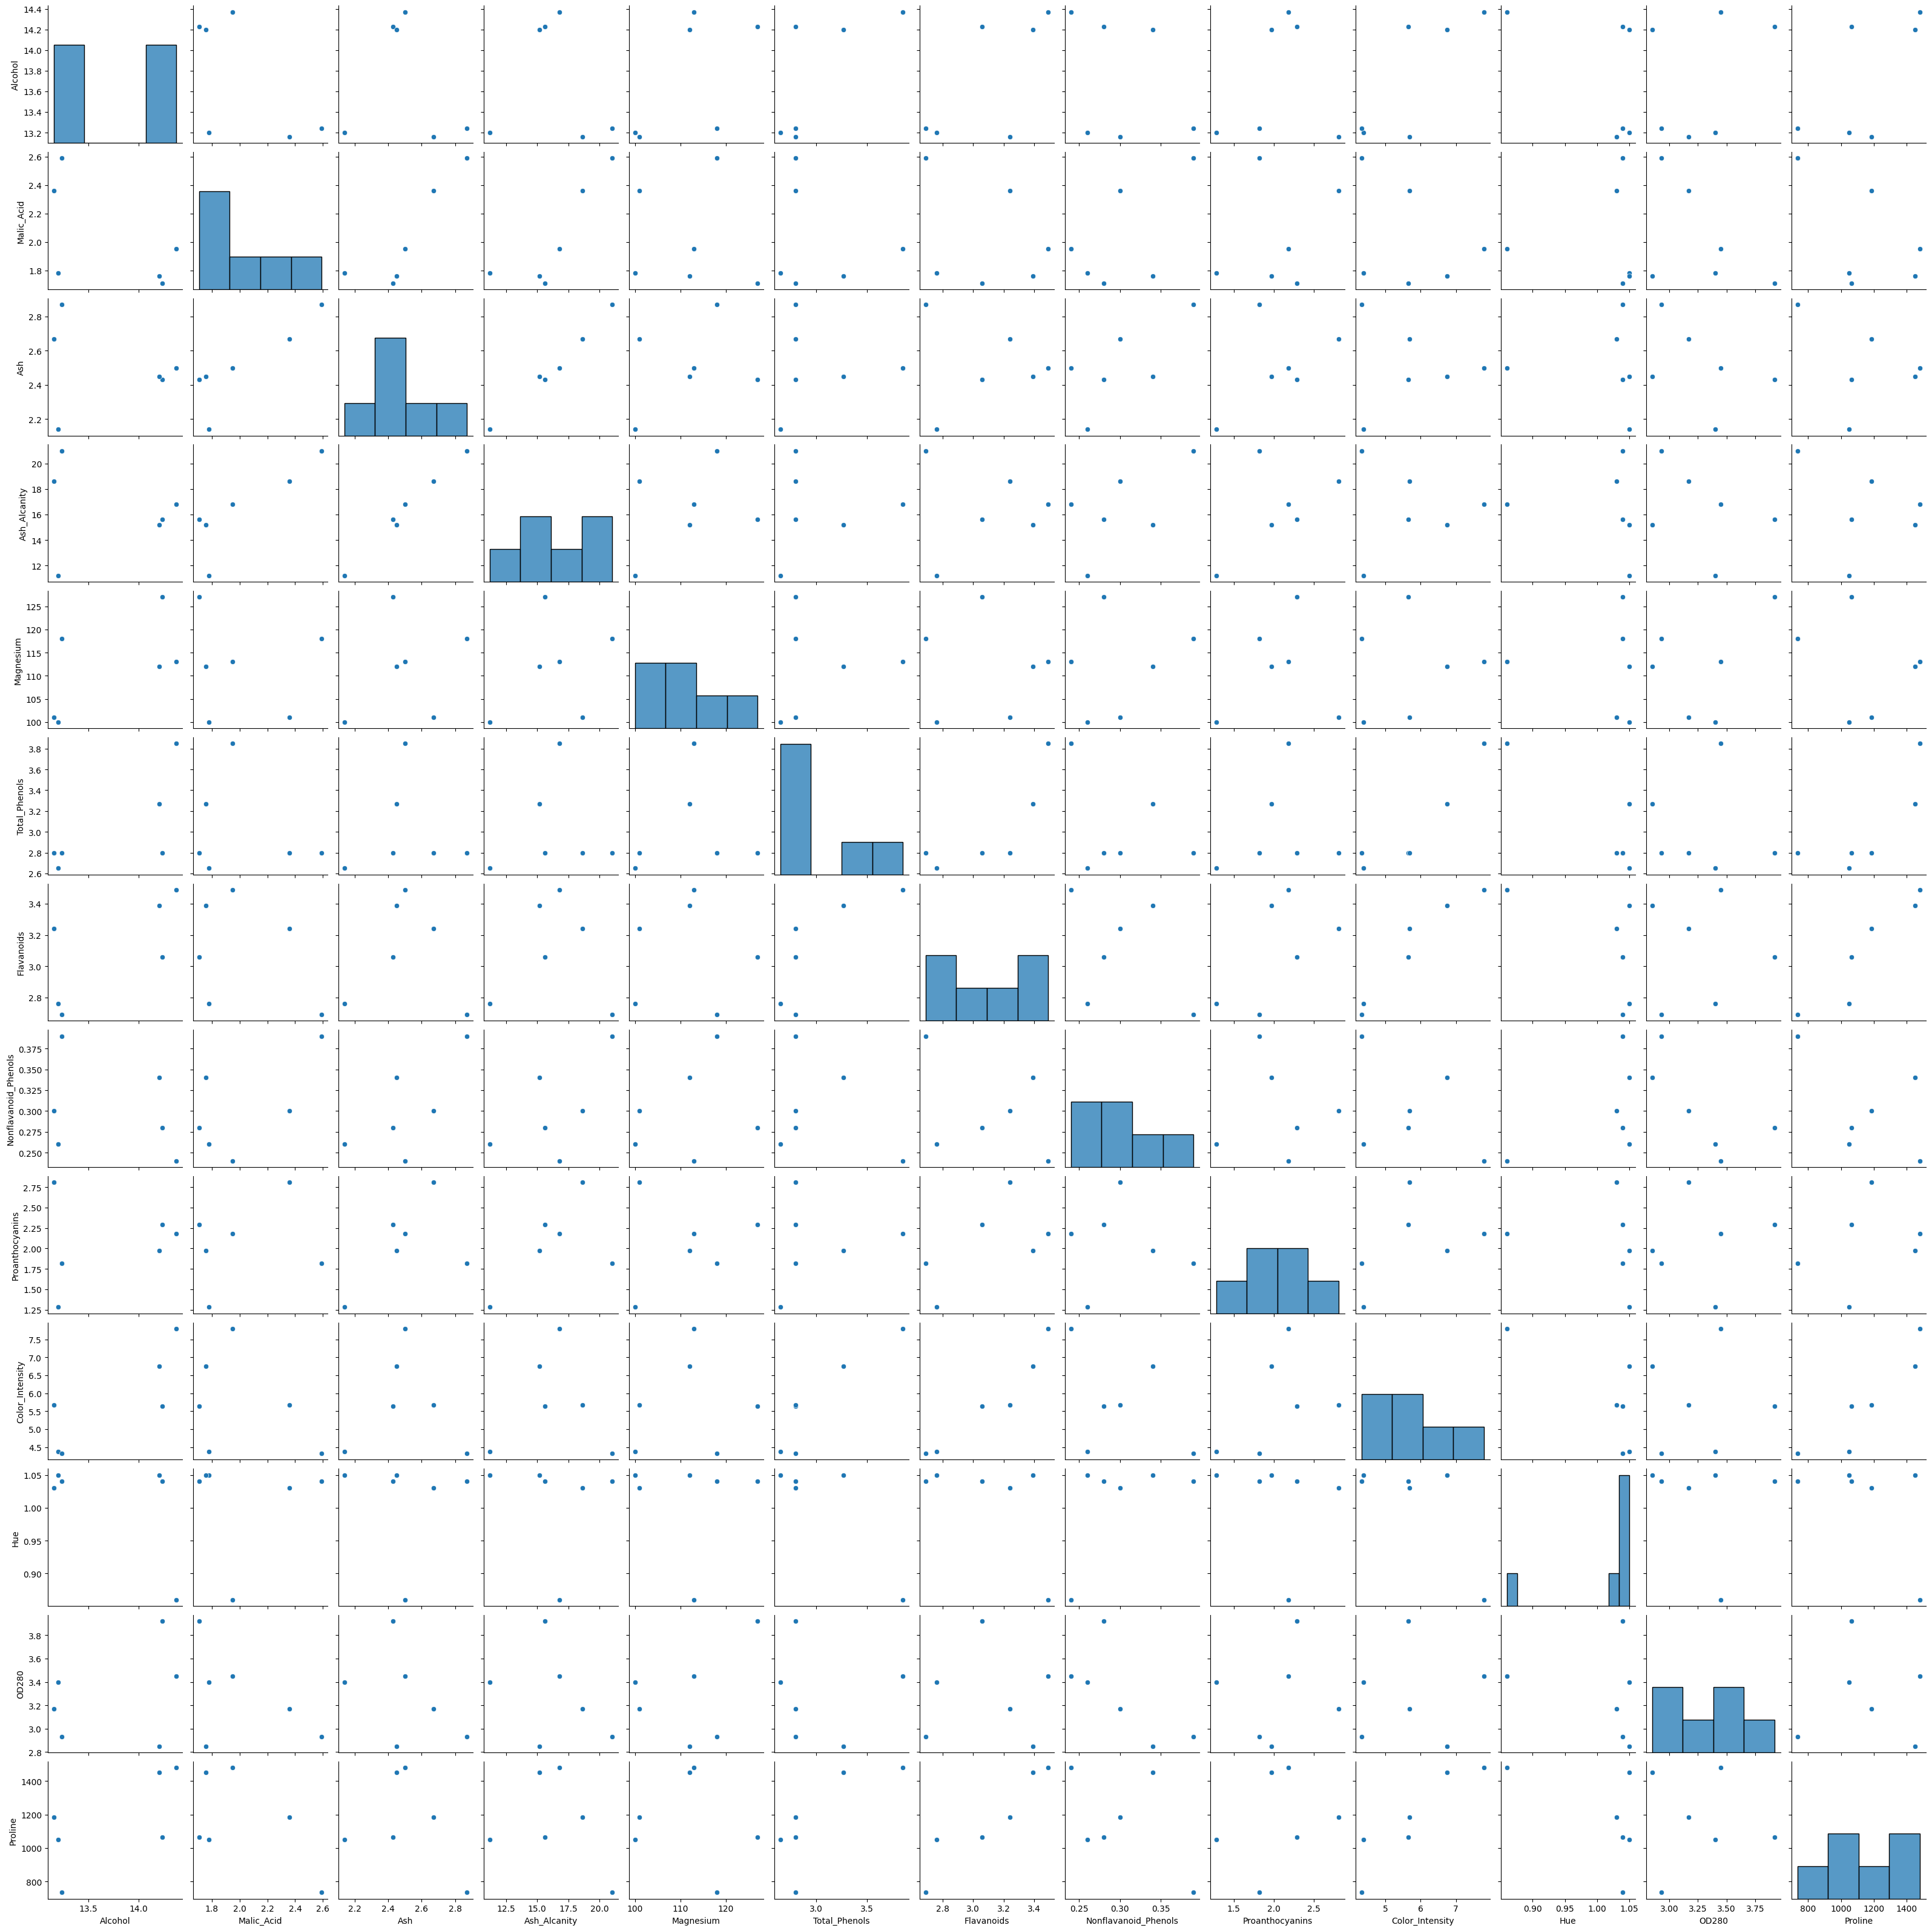

In [9]:
sns.pairplot(data[:6])
plt.show()

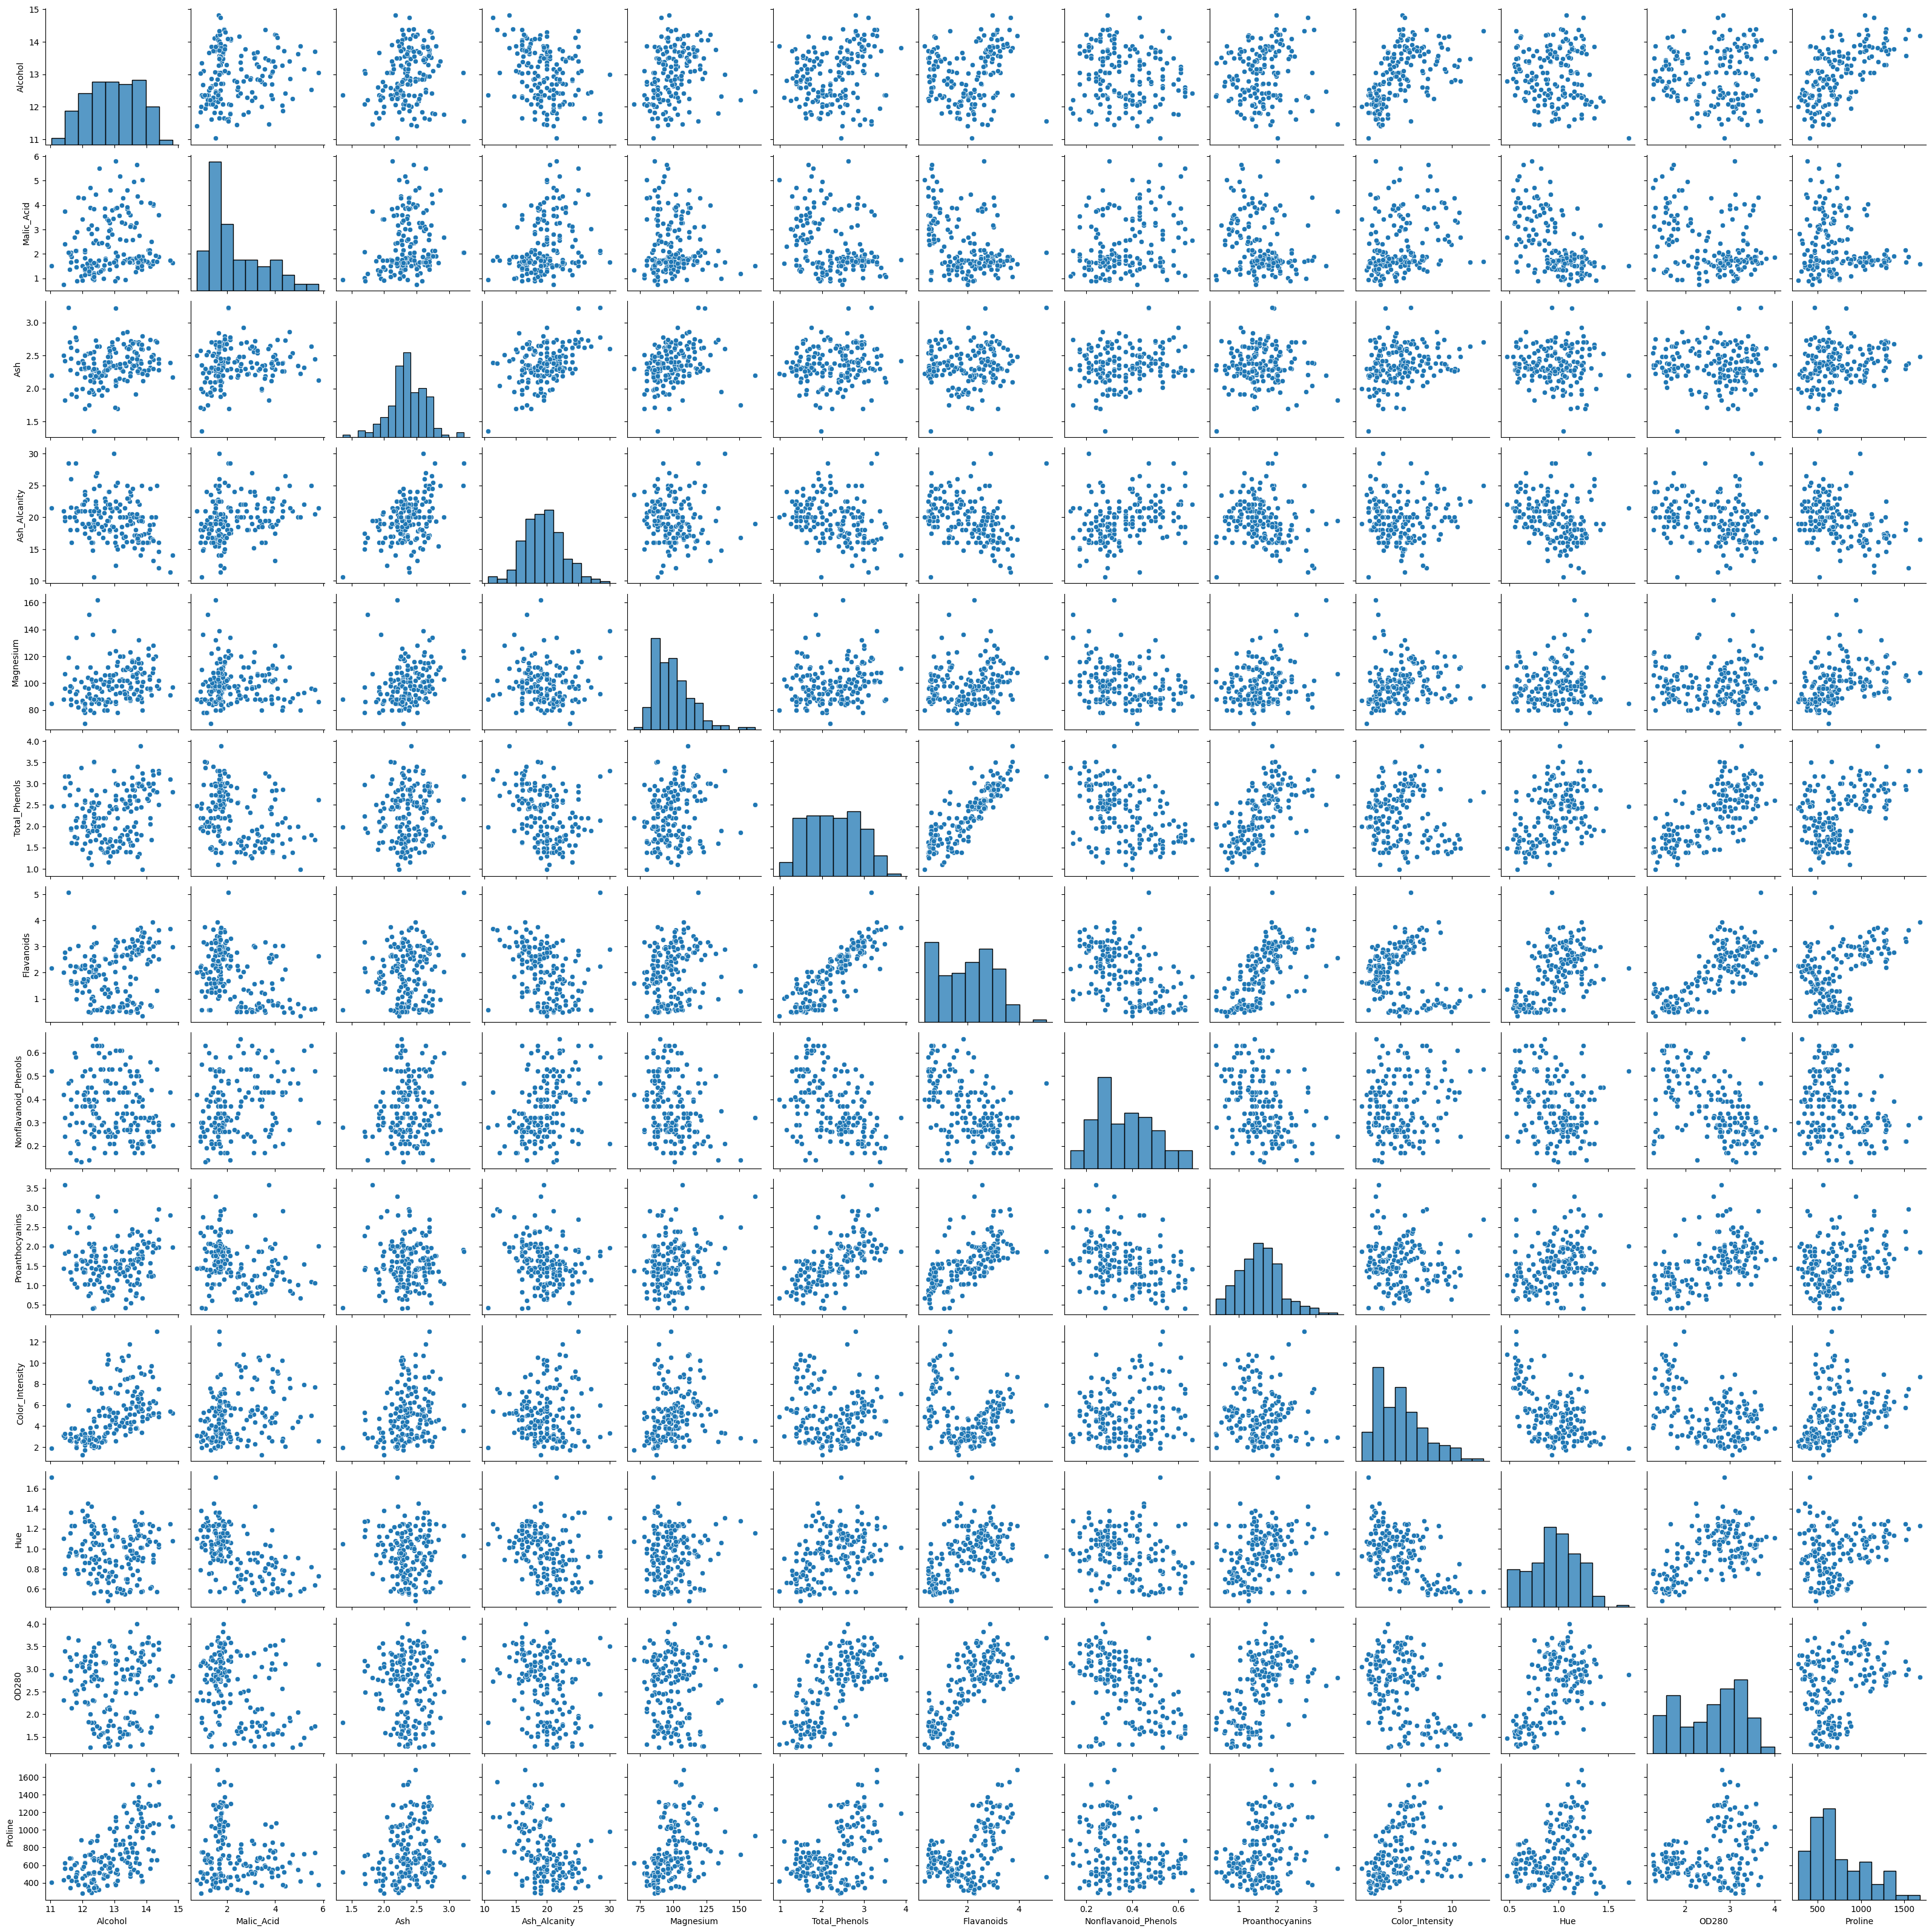

In [5]:
sns.pairplot(data[6:])  # in general, we see small positive relationship between the majority of the variables, 
# buut there are also not linearly correlated variables(~~0, like piles)
plt.show()

<AxesSubplot: >

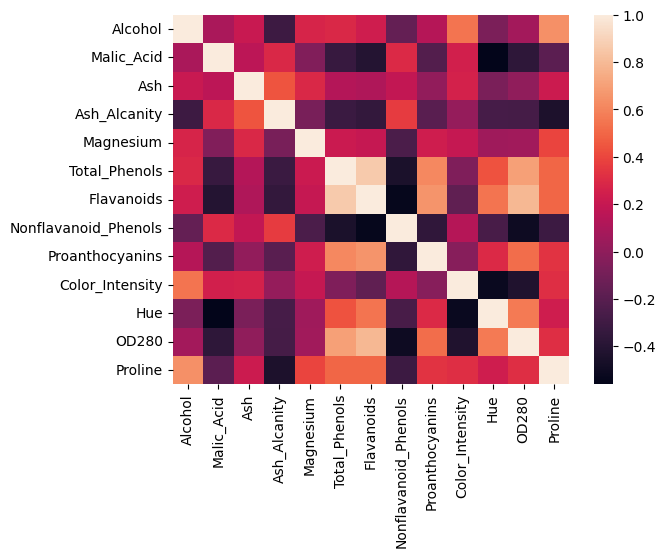

In [6]:
sns.heatmap(data.corr()) # phemols is highly correlated with
# ->od28,hue,proanthocyanins,flavanoids ,
# proline with alcohol, 
# flavanoids has higher correlations with the rest of the columns, so maybe we 

In [7]:
data.shape

(178, 13)

In [14]:
print(data.describe())
# Mg, Proline are the most abundant concentrations in the wines, 
# while phenols and hue are less significant in their amount in a wine.

       Alcohol  Malic_Acid      Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count 178.0000    178.0000 178.0000      178.0000   178.0000       178.0000   
mean   13.0006      2.3363   2.3665       19.4949    99.7416         2.2951   
std     0.8118      1.1171   0.2743        3.3396    14.2825         0.6259   
min    11.0300      0.7400   1.3600       10.6000    70.0000         0.9800   
25%    12.3625      1.6025   2.2100       17.2000    88.0000         1.7425   
50%    13.0500      1.8650   2.3600       19.5000    98.0000         2.3550   
75%    13.6775      3.0825   2.5575       21.5000   107.0000         2.8000   
max    14.8300      5.8000   3.2300       30.0000   162.0000         3.8800   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count    178.0000              178.0000         178.0000         178.0000   
mean       2.0293                0.3619           1.5909           5.0581   
std        0.9989                0.1245           0.5724 

In [15]:
data.Alcohol.value_counts() #the mode of alcohol concentration are 13.05 and 12.37, 

13.0500    6
12.3700    6
12.0800    5
12.2900    4
12.4200    3
          ..
13.7200    1
13.2900    1
13.7400    1
13.7700    1
14.1300    1
Name: Alcohol, Length: 126, dtype: int64

In [25]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735


In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
%matplotlib inline
!pip install threadpoolctl==3.1.0

# from sklearn.mixture import GMM


  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [73]:
cols = list(data.columns)
print(cols)

['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


In [81]:
def initiate_centroids(k, df):
    '''
    Select k data points as centroids
    k: number of centroids
    df: pandas dataframe(data)
    '''
    centroids = df.sample(k)
    return centroids

np.random.seed(42)
k=4
df = data[['Alcohol','Ash']]
centroids = initiate_centroids(k, df)
centroids

,Alcohol,Ash
19,13.6400,2.5600
45,14.2100,2.4400
140,12.9300,2.7000
30,13.7300,2.7000


In [77]:
 #now compute the distances of all neew datapoints from these ransom 4 centers
    
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

In [79]:
#now calculate the lowest distances(loss function) and do assignments of each row(dpoint) to one of these clusters
def centroid_assign(df, centroids):
    '''
    Given a dataframe `df` and a set of `centroids`, we assign each
    data point in `df` to a centroid. 
    - df - pandas dataframe with observations(data)
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0] # #of clusters
    n = df.shape[0]  # # of poitns to be assigend
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], df.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [90]:
assignm = centroid_assign(df,centroids)
result=pd.DataFrame({'centroid': assignm[0], 'error':assignm[1]})

print(result.centroid.unique())
result.head() #the corresp indices of rows , tehir assignments to one of 0,1,2,3
clusters and the calculated losses

[1 0 2 3]


,centroid,error
0,1,0.0000
1,0,0.1369
2,2,0.0029
3,1,0.0009
4,2,0.0156


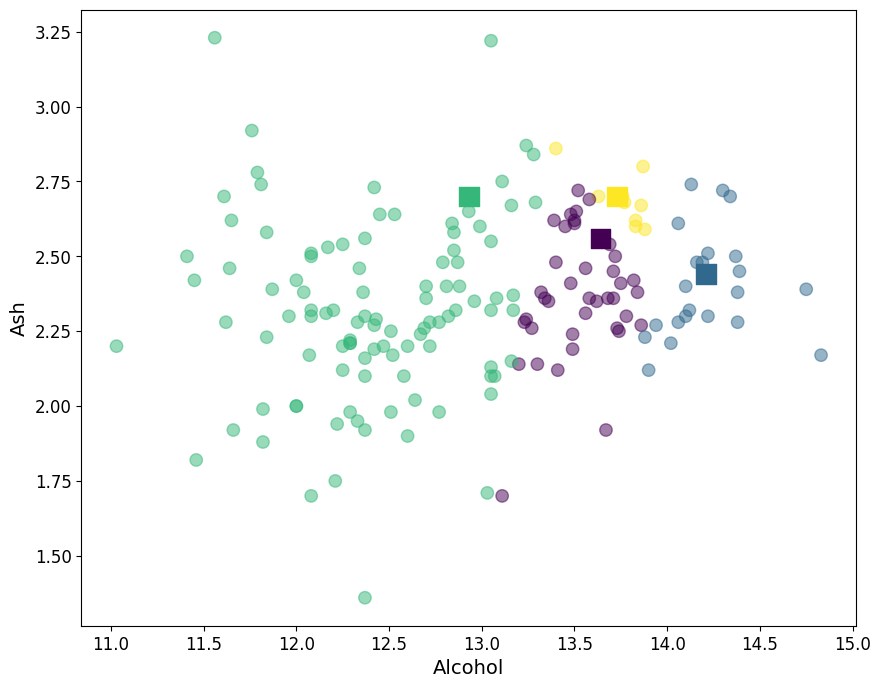

In [94]:
#update the centrers
fig, ax = plt.subplots(figsize=(10, 8)) #teh clusetring is done on two dimensions, 1st and 2nd features, 
# maybe dimension reduction should be used to include all dimensions
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', c=result['centroid'].astype('category'),  s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 's', s=200,c=[0, 1, 2,3])
ax.set_xlabel(r'Alcohol', fontsize=14)
ax.set_ylabel(r'Ash', fontsize=14)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# the 4 centers and data assigned (wrt first 2 features)

In [ ]:
# Apply GMMs, k-means, and k-medoids clustering algorithms on the Wine dataset. Use the scikit-learn library to
#    implement these algorithms.

# 3. Experiment with data feature scaling for all three algorithms, resulting at least six kind of experiments (3 models,
#    scaling vs no-scaling).
#    You can choose any kind of scaling that you find useful for your features. 

In [97]:
#now with pythons kmeans
model = KMeans(n_clusters=4, random_state=42) 
kmeans = model.fit(df)

C:\Users\blilit\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [37]:

gmm = GMM(n_components=4,covariance_type='full')
gmm.fit(data)
labels = gmm.predict(data)

AttributeError: 'NoneType' object has no attribute 'split'

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42).fit(df)
kmeans.labels_

C:\Users\blilit\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [48]:
!pip install scikit-learn-extra

     ------------------------------------ 346.2/346.2 kB 325.9 kB/s eta 0:00:00


In [49]:
from sklearn.metrics import silhouette_samples
from sklearn_extra.cluster import KMedoids

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 0 3 0 0 2 3 3 2 2 2 0 0 1
 2 0 0 3 2 0 0 2 3 3 3 0 3 3 2 3 0 0 3 0 0 2 3 0 2 0 2 3 0 0 2 0 3 3 0 2 3
 0 3 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 2 2 3 3 3 3 2 3 3 2 2 0 3
 3 3 3 0 0 2 3 2 0 2 2 3 3 2 3 2 3 3 2 2 2 3 3 0 2 2 2 2 2 3]
{0, 1, 2, 3}
[[1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]
 [1.367e+01 1.250e+00 1.920e+00 1.800e+01 9.400e+01 2.100e+00 1.790e+00
  3.200e-01 7.300e-01 3.800e+00 1.230e+00 2.460e+00 6.300e+02]
 [1.311e+01 1.010e+00 1.700e+00 1.500e+01 7.800e+01 2.980e+00 3.180e+00
  2.600e-01 2.280e+00 5.300e+00 1.120e+00 3.180e+00 5.020e+02]
 [1.237e+01 1.170e+00 1.920e+00 1.960e+01 7.800e+01 2.110e+00 2.000e+00
  2.700e-01 1.040e+00 4.680e+00 1.120e+00 3.480e+00 5.100e+02]
 [1.184e+01 2.890e+00 2.230e+00 1.800e+01 1.120e+02 1.720e+00 1.320e+00
  4.300e-01 9

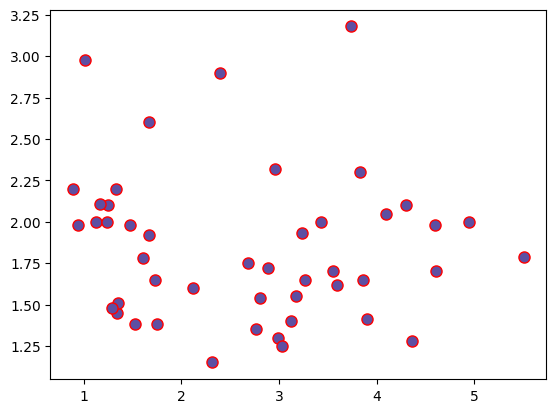

In [71]:
centers = [data.iloc[0,:],data.iloc[1,:]]
centers
df = data.to_numpy()
KMobj = KMedoids(n_clusters=4).fit(df)# — — — — — — -Assigning Cluster Labels — — — — — — — — — — — -
labels = KMobj.labels_
print(labels)
unq_lab = set(labels)
print(unq_lab)

colors_plot = [plt.cm.Spectral(each) for each in np.linspace(0, 3, len(unq_lab))]
for k, col in zip(unq_lab, colors_plot):class_member_mask = labels == k
    
xy = df[class_member_mask]
print(xy)
plt.plot(xy[:,1],xy[:,5],"o",markerfacecolor=tuple(col),markeredgecolor="red",markersize=8); #for the 2nd and 6th features, but idk it does not show different colors for 4 different clusters 

In [51]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(data)

# print('Label   Medoid        Index')
# print('---------------------------')
# for index in kmedoids.medoid_indices_:
#     label = kmedoids.labels_[index]
#     medoid = data[index]
#     print(f'{label:<7} {medoid}  {index}')

df = pd.DataFrame({'label': kmedoids.labels_[kmedoids.medoid_indices_],
                   'medoid': np.squeeze(data[kmedoids.medoid_indices_]),
                   'index': kmedoids.medoid_indices_})
print(df)

KeyError: "None of [Int64Index([135, 72, 17], dtype='int64')] are in the [columns]"